#**ANÁLISIS DE EVASIÓN DE CLIENTES PT I**

#📌 Extracción

In [4]:
import pandas as pd

#dataframe
df= pd.read_json('/content/TelecomX_Data.json')
df.head()







,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.shape
#dimension

(7267, 6)

In [6]:
columnas_anidadas = ['customer', 'phone', 'internet', 'account']

dfs_normalizados = [pd.json_normalize(df[col]) for col in columnas_anidadas]

df_base = df.drop(columns=columnas_anidadas)

# Concatenar todo
df_final = pd.concat([df_base] + dfs_normalizados, axis=1)

# Mostrar las primeras filas
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [7]:
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(bool)

df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce')
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
print(df_final.isnull().sum())


customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [12]:
df_final = df_final.dropna(subset=['Charges.Total'])


In [13]:
print(df_final.isnull().sum())


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   bool   
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

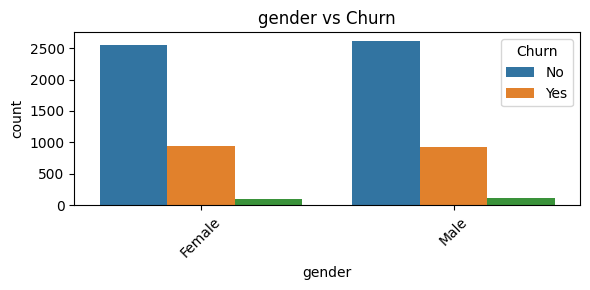

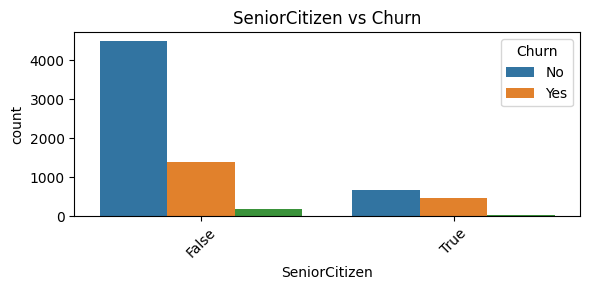

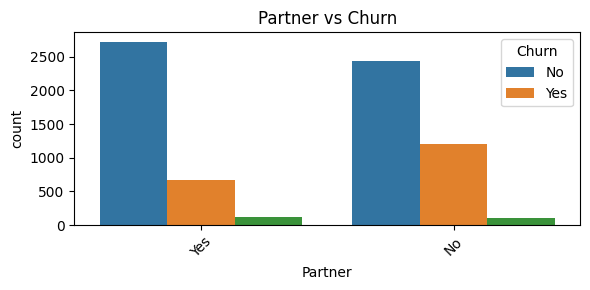

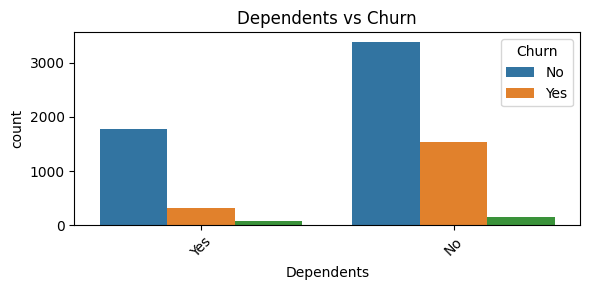

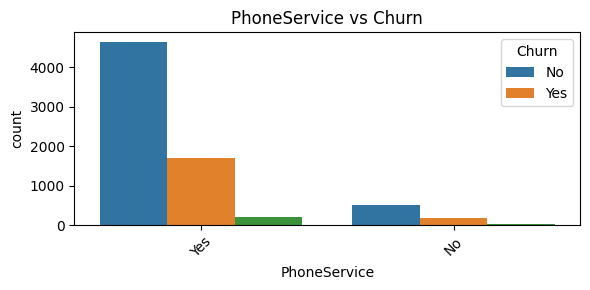

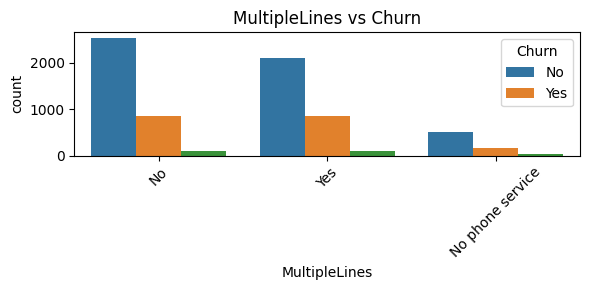

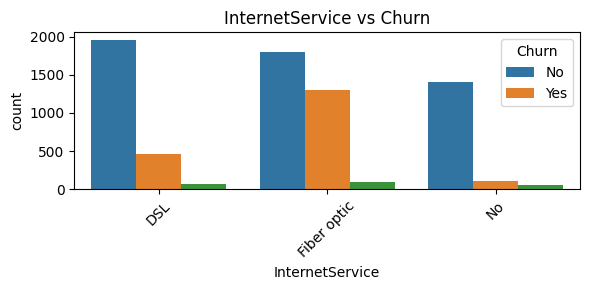

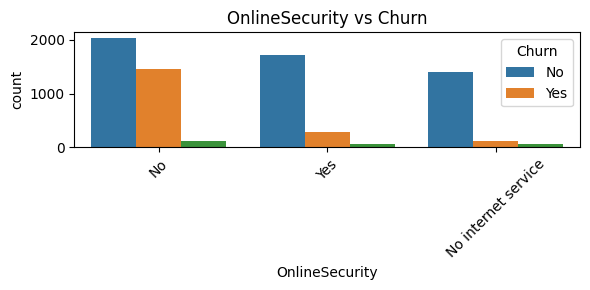

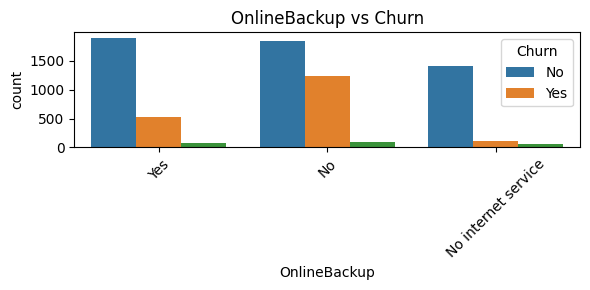

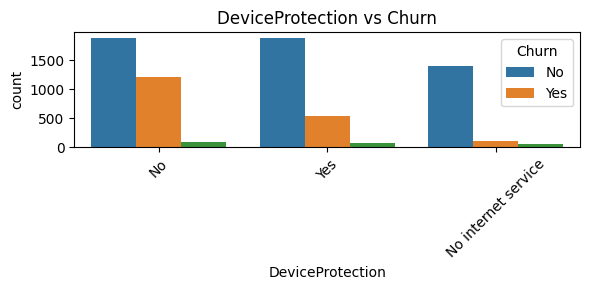

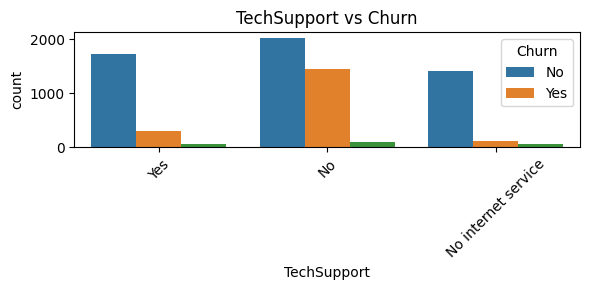

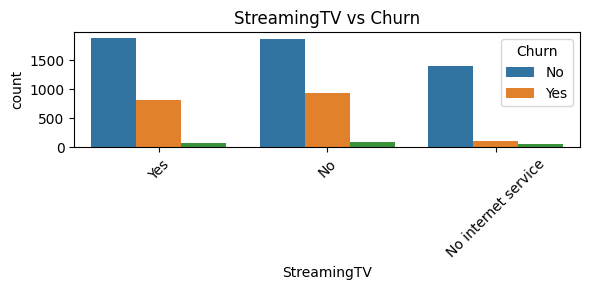

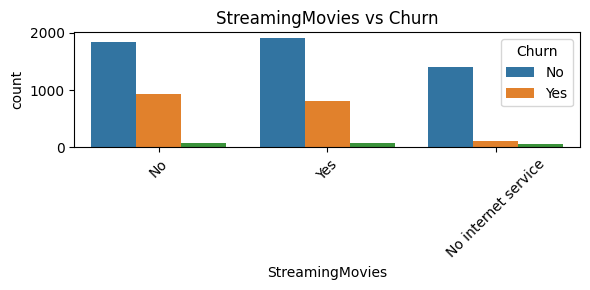

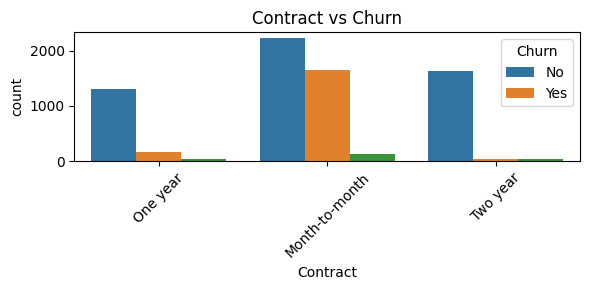

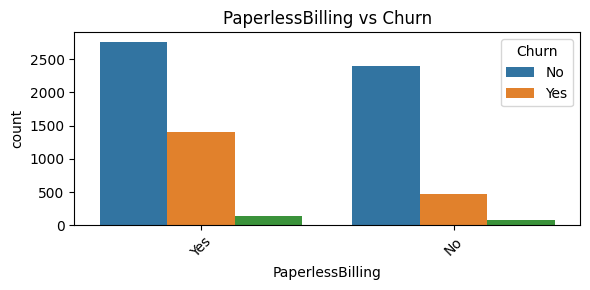

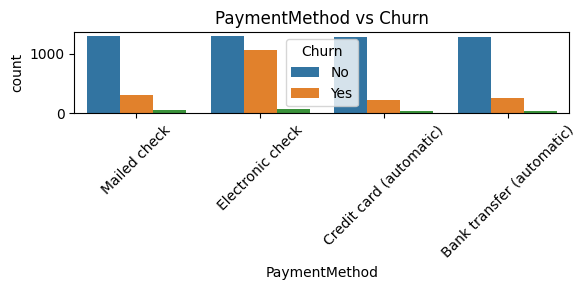

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo: columnas categóricas a analizar
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Gráfico para cada una
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df_final, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [17]:
df_final['Cuentas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)


In [18]:
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80


In [19]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [20]:
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService',
                 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in cols_binarias:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})


In [ ]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,False,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,False,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,False,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,True,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,True,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [21]:
df_final = pd.get_dummies(df_final, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)


In [22]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,Charges.Monthly,Charges.Total,Cuentas_Diarias,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0002-ORFBO,0.0,Female,False,1,1,9,1,0.0,0.0,...,65.6,593.30,2.19,True,False,False,False,True,False,False
1,0003-MKNFE,0.0,Male,False,0,0,9,1,1.0,0.0,...,59.9,542.40,2.00,False,False,False,False,True,False,False
2,0004-TLHLJ,1.0,Male,False,0,0,4,1,0.0,0.0,...,73.9,280.85,2.46,False,False,False,True,False,True,False
3,0011-IGKFF,1.0,Male,True,1,0,13,1,0.0,0.0,...,98.0,1237.85,3.27,False,False,False,True,False,True,False
4,0013-EXCHZ,1.0,Female,True,1,0,3,1,0.0,0.0,...,83.9,267.40,2.80,False,False,False,False,True,True,False


#📊 Carga y análisis

In [23]:
# Estadísticas descriptivas generales
df_final.describe().T


,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.265785,0.441782,0.00,0.000,0.00,1.0,1.00
Partner,7256.0,0.483600,0.499765,0.00,0.000,0.00,1.0,1.00
Dependents,7256.0,0.299063,0.457879,0.00,0.000,0.00,1.0,1.00
tenure,7256.0,32.395535,24.558067,1.00,9.000,29.00,55.0,72.00
PhoneService,7256.0,0.902839,0.296197,0.00,1.000,1.00,1.0,1.00
MultipleLines,6551.0,0.467257,0.498965,0.00,0.000,0.00,1.0,1.00
OnlineSecurity,5681.0,0.365077,0.481494,0.00,0.000,0.00,1.0,1.00
OnlineBackup,5681.0,0.440063,0.496438,0.00,0.000,0.00,1.0,1.00
DeviceProtection,5681.0,0.437775,0.496157,0.00,0.000,0.00,1.0,1.00
TechSupport,5681.0,0.369653,0.482753,0.00,0.000,0.00,1.0,1.00


In [24]:
variables = ['gender', 'Contract', 'PaymentMethod', 'InternetService']


In [25]:
# Recarga el JSON solo para gráficas, sin get_dummies
df_vis = pd.read_json('TelecomX_Data.json')

# Normaliza las columnas necesarias como antes
from pandas import json_normalize

columnas = ['customer', 'phone', 'internet', 'account']
df_vis = pd.concat([df_vis.drop(columns=columnas)] + [json_normalize(df_vis[col]) for col in columnas], axis=1)


In [26]:
df_vis.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


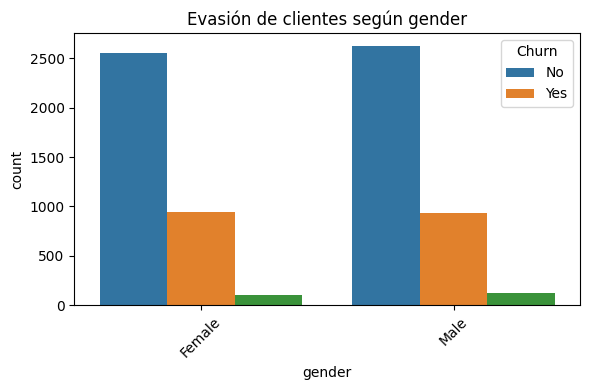

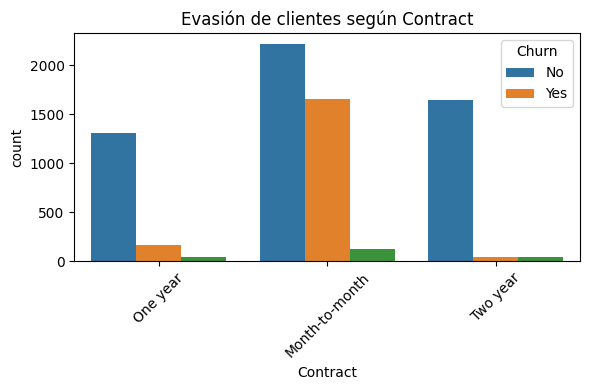

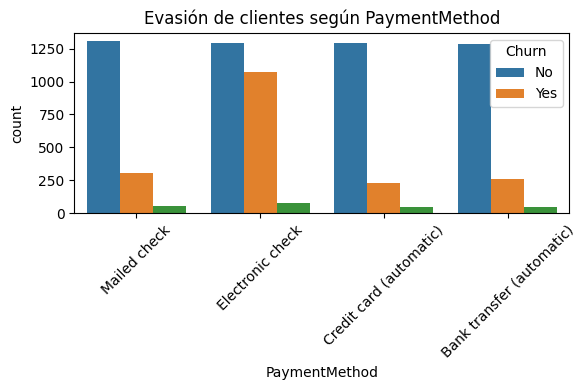

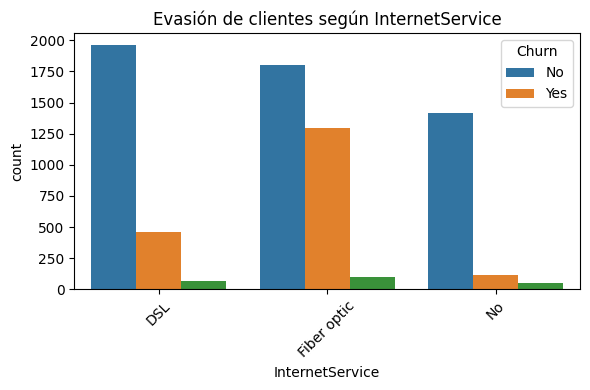

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in variables:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_vis, x=var, hue='Churn')
    plt.title(f'Evasión de clientes según {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


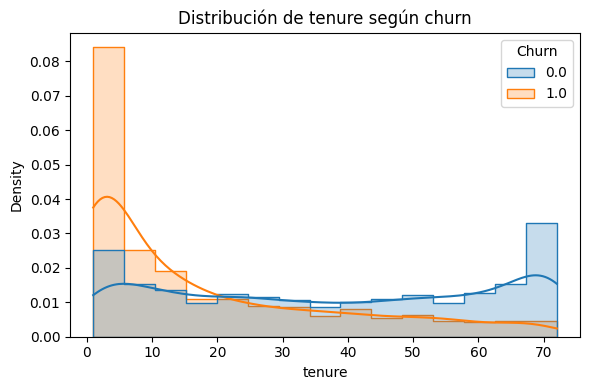

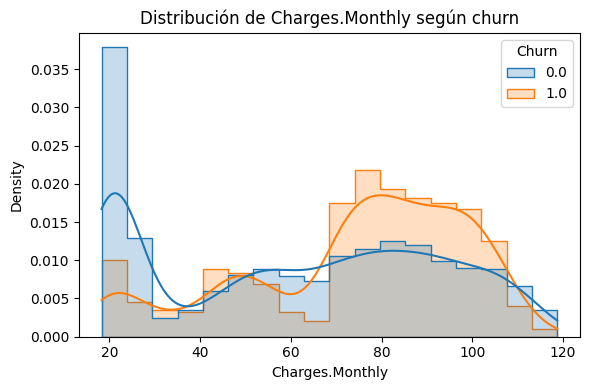

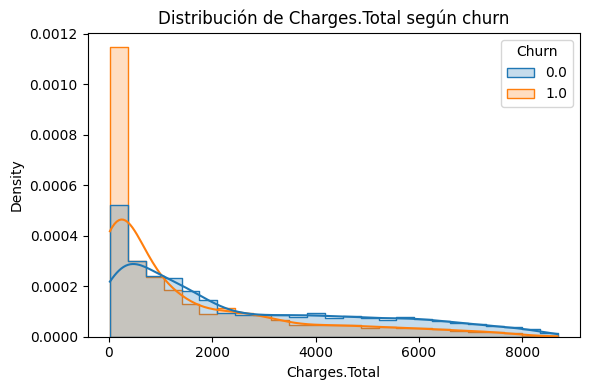

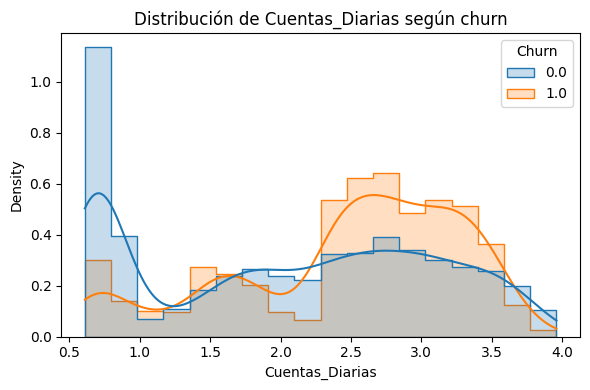

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for var in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_final, x=var, hue='Churn', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {var} según churn')
    plt.tight_layout()
    plt.show()


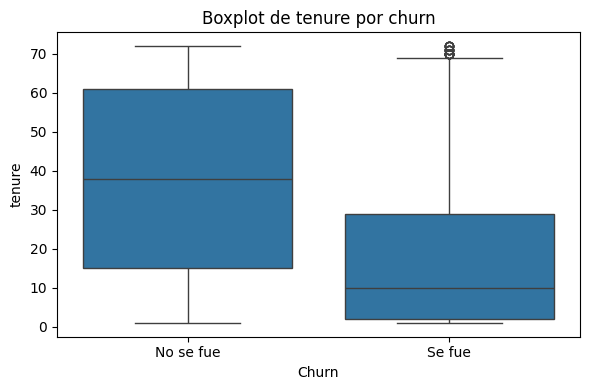

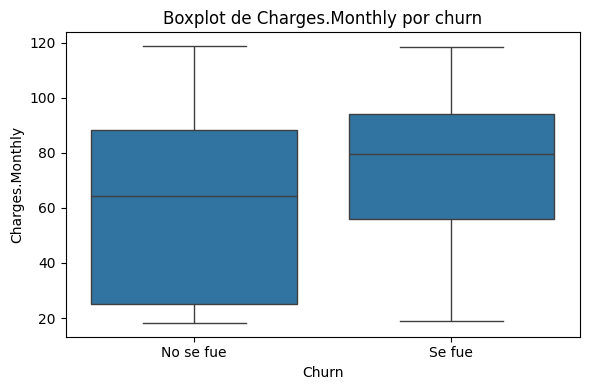

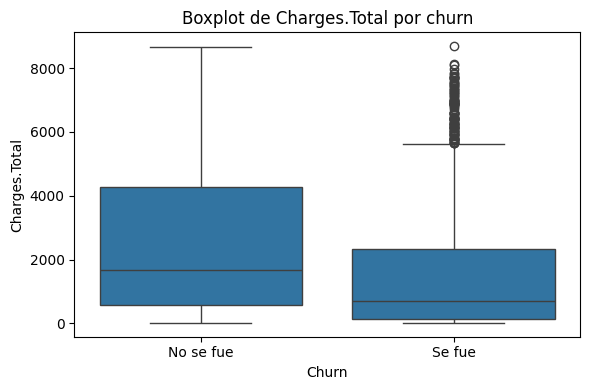

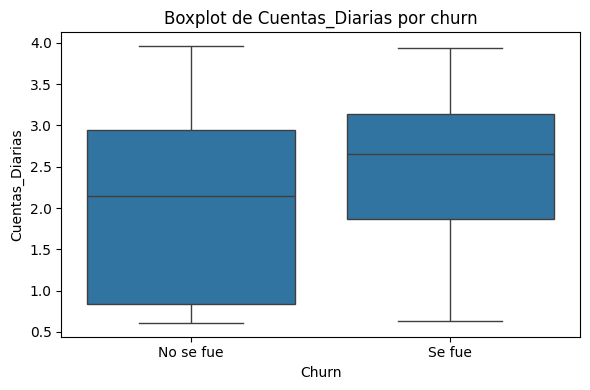

In [29]:
for var in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x='Churn', y=var)
    plt.title(f'Boxplot de {var} por churn')
    plt.xticks([0, 1], ['No se fue', 'Se fue'])
    plt.tight_layout()
    plt.show()


#📄Informe final

Este informe presenta un análisis completo sobre la pérdida de clientes (churn) en una empresa de telecomunicaciones. El propósito fue identificar los factores que influyen en la cancelación del servicio, con el objetivo de diseñar estrategias que mejoren la retención.

El análisis inició con la carga de datos desde un archivo JSON y la normalización de columnas anidadas. Se generó un DataFrame limpio, eliminando 11 registros con valores nulos en la variable Charges.Total. Se añadió la variable Cuentas_Diarias, calculada dividiendo el cargo mensual entre 30, y se transformaron variables categóricas en valores numéricos, además de aplicar codificación one-hot a variables multiclase. También se renombraron columnas clave para mayor claridad.

Durante la exploración de datos, se observó que clientes con contratos mensuales o pagos mediante “Electronic check” presentaban mayores tasas de cancelación. A nivel numérico, se detectó que quienes cancelan suelen tener menor tiempo con la empresa y mayores gastos mensuales. Además, se identificó que servicios adicionales como OnlineSecurity o TechSupport están vinculados con una mayor permanencia.

In [30]:
df_final.to_csv('clientes_tratados.csv', index=False)
